# Information Retrieval in High Dimensional Data
## Lab #6, 23.11.2017

## Principal Component Analysis

### Task 1

In this task we will once again work with the MNIST training set as provided on Moodle. Chose three digit classes, e.g. 1, 2 and 3 and load N=1000 images from each of the clsses to the workspace. Store the data in a normalized matrix $X$ of type double and size(784, 3\*N). Furthermore, generate  color label matrix $C$ of dimensions (3\*N, 3). Each row of $C$ assigns an RGB color vector to the repective column of $X$ as an indicator of the digit class. Choose [0, 0, 1], [0, 1, 0] and [1, 0, 0] for the three digit classes.

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [8]:
N = 1000
X = np.zeros((784, 3*N), dtype='float64')
for i in range(1, 4):
    path = 'mnist/d{}/'.format(i)
    filenames = sorted((fn for fn in os.listdir(path) if fn.endswith('.png')))
    for idx, fn in enumerate(filenames):
        im = imageio.imread(path + fn)
        X[:, idx + N*(i-1)] = np.reshape(im, 784)
        if idx == 999:
            break

In [9]:
labels = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])
C = np.zeros((3*N, 3))
for i in range(3):
    for j in range(1000):
        C[N*i + j, :] = labels[i]
C

array([[ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       ..., 
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

a) Compute the row-wise mean mu of $X$ and substract it from each column of $X$.
Save the results as X_c.

In [10]:
mu = np.mean(X, axis=1)
X_c = X-np.expand_dims(mu, axis=1)

b) Use np.linalg.svd with full_matrices=False to compute the singular value decomposition [U, SIgma, VT] of X_c. Make sure the matrices are sorted in descending order with respect to the singular values.

In [11]:
U, Sigma, VT = np.linalg.svd(X_c, full_matrices=False)

c) Use reshape in order to convert mu and the first three columns of U to (28, 28)-matrices. Plot the resulting images. What do you see?

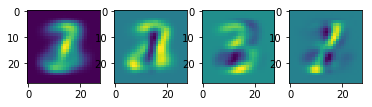

In [12]:
plt.subplot(141)
plt.imshow(np.reshape(mu, (28,28)))
plt.subplot(142)
plt.imshow(np.reshape(U[:, 0], (28,28)))
plt.subplot(143)
plt.imshow(np.reshape(U[:, 1], (28,28)))
plt.subplot(144)
plt.imshow(np.reshape(U[:, 2], (28,28)))

plt.show()

d) Compute the matrix S=np.dot(np.diag(Sigma), VT)). Note that ths yields the same result s S=np.dot(U.T, X_c). The S matrix contains the 3\*N scores for the principal components 1 to 784. Create a 2D scatter plot with C as its color parameter in order to plot the scores for the first $two$ rincipal components of the data.

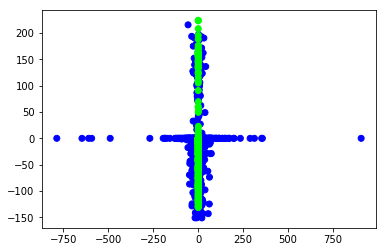

In [13]:
S = np.dot(np.diag(Sigma), VT)
plt.scatter(S[:,:2], X_c[:, :2], c=C)
plt.show()

### Task 2

In this task we consider the problem of choosing he number of principal vectors. Assuming that $\mathbf{X} \in \mathbb{R}^{p\times N}$ is the centered data matrix and $ \mathbf{P} = \mathbf{U}_k \mathbf{U}_k^T $ is the projector onto the $k$-dimensional principal subspace, the dimension $k$ is chosen such that the fraction of overall energy contained in the projection error does not exceed $\epsilon$, i.e.

\begin{equation} \frac{\|\mathbf{X} - \mathbf{PX}\|_F^2}{\| \mathbf{X}\|_F^2} = \frac{\sum_{i=1}^M \|\mathbf{x}_i - \mathbf{Px}_i\|^2}{\sum_{i=1}^N \| \mathbf{x}_i\|^2} \leq \epsilon ,\end{equation}

where $\epsilon$ is usually chosen to be between $0.01$ and $0.2$.

The MIT VisTex database as provided on Moodle consists of a set of 167 RGB texture images of sizes (512, 512, 3). Download the ZIP file, unpack it and make yourself familiar with the directory structure.

a) After preprocessing the entire image set (converting to normalized grayscale matrices), divide the images into non overlapping tiles of sizes (64, 64) and  create a centered data matrix X_c of size (p, N) from them, where P=64\*64 and N=167\*(512/64)\*(512/64).

b) Compute the SVD of X_c and make sure the singular values are sorted in descending order.

c) Plot the fraction of energy contained in the projection error for the principal subspace dimensions 0 to p. How many principal vectors do you need to retain 80%, 90%, 95% or 99% of the original data energy?

d) Discuss: Can you imagine a scenario, where energy is a bad measure of useful information?